# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc



pd.set_option("display.max_columns", 101)
pd.set_option("display.max_rows", 500)

# Import Data

In [3]:
ppi_data = pd.read_excel(r'D://Projects\MortgageInsurance\Dataset.xls')

In [4]:
ppi_data.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,H,Y,0,M,M,288,S,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,168,178000,47679,64406,513,5,D,46,64,1,5,16,0,0,0,0,9,10,N,1,18,6,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,H,Y,0,S,F,37,R,P,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,300,180000,11563,31614,331,5,D,59,13,0,0,99,0,1,0,0,6,22,N,0,203,8,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,H,Y,0,M,M,154,P,F,P,5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,369,199000,17563,26045,413,0,D,56,19,2,30,50,266,0,0,0,1,21,N,1,87,7,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,R,Y,0,M,M,82,G,F,P,6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,216,120000,0,181217,1112,5,D,33,160,0,0,99,1,1,0,0,5,0,N,0,229,9,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,H,Y,2,M,M,342,S,F,P,6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,510,180000,60101,63811,435,0,D,49,62,0,0,99,0,0,0,0,1,13,N,0,38,6,N,99,Single,1,718.0,LASCI,Single,1,0,0


# Remove redundant/forward looking variables

In [5]:
ppi_data.drop(columns = ['code','prdt_desc','category','Payment_Method','Insurance_Description','Ref','Telephone_Indicator','PPI_SINGLE','PPI_JOINT','PPI_LCI'], inplace = True)

# Outlier Detection & Treatment

In [6]:
copy_ppi_data = ppi_data.copy()

col_list=['Credit_Score','Outstanding_Mortgage_Bal','APR','Value_of_Property','Total_value__CAIS_8_9s','Age','Mosaic','Term']

def outlier(col_list,df):
    for col in col_list:
        p99=np.percentile(df[col], 99)
        p1=np.percentile(df[col],1 )
        df.loc[ppi_data[col]>p99,col]=p99
        df.loc[ppi_data[col]<p1,col]=p1
    return df

outlier(col_list,ppi_data)

,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,PPI
0,918.0,A,36.0,3000.0,14.4,UnSecured,46.0,8,132,H,0,M,M,288,S,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,168,178000.0,47679.0,64406,513,5,46.0,64,1,5,16,0.0,0,0,0,9,10,N,1,18,6,N,16,0
1,903.0,A,120.0,21000.0,7.9,secured,16.0,3,288,H,0,S,F,37,R,P,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,300,180000.0,11563.0,31614,331,5,59.0,13,0,0,99,0.0,1,0,0,6,22,N,0,203,8,N,99,1
2,1060.0,X,78.0,7200.0,7.9,secured,17.0,3,276,H,0,M,M,154,P,F,P,5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,369,199000.0,17563.0,26045,413,0,56.0,19,2,30,50,266.0,0,0,0,1,21,N,1,87,7,N,50,1
3,839.0,B,60.0,8000.0,16.9,UnSecured,47.0,8,48,R,0,M,M,82,G,F,P,6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,216,120000.0,0.0,181217,1112,5,33.0,160,0,0,99,1.0,1,0,0,5,0,N,0,229,9,N,99,1
4,1057.0,X,60.0,7650.0,7.4,UnSecured,55.0,10,156,H,2,M,M,342,S,F,P,6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,510,180000.0,60101.0,63811,435,0,49.0,62,0,0,99,0.0,0,0,0,1,13,N,0,38,6,N,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,952.0,X,60.0,5000.0,8.9,UnSecured,59.0,11,193,H,0,S,F,57,P,F,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,FALS,TRUE,225,465000.0,230000.0,239597,1150,0,46.0,237,0,0,99,0.0,1,0,0,0,0,N,0,43,5,N,99,0
16379,922.0,A,60.0,7500.0,7.9,UnSecured,55.0,10,1,H,0,S,M,36,P,F,P,4,TRUE,TRUE,TRUE,FALSE,FALSE,FALS,FALSE,240,135000.0,122085.0,127002,639,4,32.0,124,0,0,99,0.0,0,0,0,2,0,N,0,50,8,N,99,0
16380,831.0,C,60.0,1000.0,25.9,UnSecured,12.0,2,47,H,0,S,F,41,P,F,P,2,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,180,245000.0,110000.0,126399,930,0,30.0,109,0,0,99,0.0,0,0,0,1,1,N,0,187,9,N,99,1
16381,790.0,D,36.0,3000.0,25.9,UnSecured,9.0,2,130,H,0,M,F,36,P,F,P,3,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,227,230000.0,76000.0,120809,513,0,58.0,80,0,0,99,0.0,3,2,1,2,9,N,0,421,9,N,99,1


# Correlation (Spearman)- With Target Variable

In [7]:
ppi_data[ppi_data.columns[1:]].corr(method="spearman")['PPI'][:]

Term                                0.131245
Net_Advance                        -0.036069
APR                                 0.057867
Mosaic                              0.136443
Mosaic_Class                        0.132313
Time_at_Address                     0.092877
Number_of_Dependants               -0.056409
Time_in_Employment                 -0.011381
Income_Range                       -0.058421
Time_with_Bank                      0.044028
Value_of_Property                  -0.177329
Outstanding_Mortgage_Bal           -0.121910
Total_Outstanding_Balances         -0.106575
Bureau_Data___Monthly_Other_Co_R   -0.105242
Worst_History_CT                   -0.041451
Age                                 0.073371
Total_outstanding_balance__mortg   -0.118846
Total___Public_Info___CCJ____ban    0.106184
Total_value__Public_Info___CCJ__    0.104267
Time_since_most_recent_Public_In   -0.105711
Total_value__CAIS_8_9s              0.138705
Worst_status_L6m                    0.067342
Worst_CUrr

# Coorelation (Spearman)- With Independent Variables

<ipython-input-8-de94cb995b40>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(my_r, dtype=np.bool)


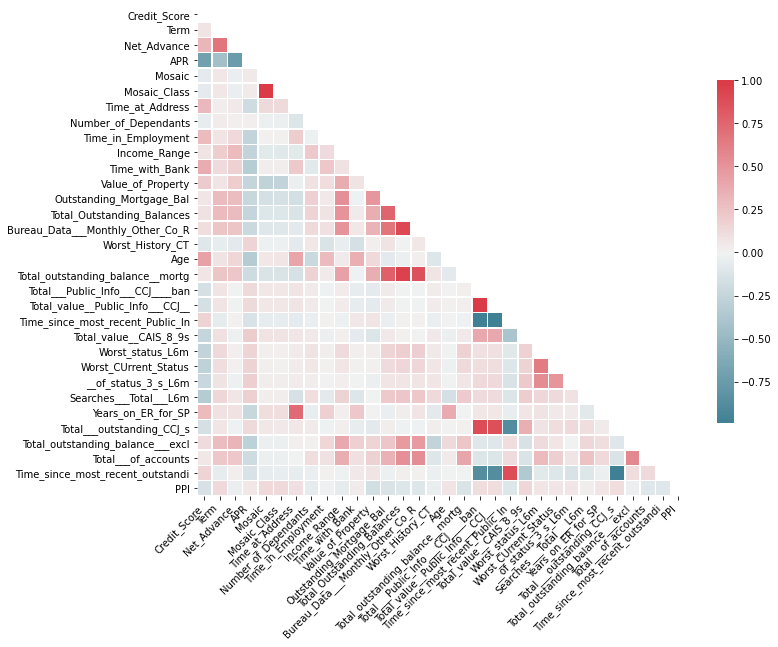

In [8]:
my_r = ppi_data.corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.zeros_like(my_r, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(20, 220, n=400)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(my_r, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Remove highly correlated variables

In [9]:
ppi_data.drop(columns = ['Mosaic','Time_since_most_recent_outstandi','Total___outstanding_CCJ_s','Time_since_most_recent_Public_In','Total_value__Public_Info___CCJ__','Total_Outstanding_Balances','Bureau_Data___Monthly_Other_Co_R','Total_outstanding_balance__mortg'], inplace = True)

# Create Bins

In [10]:
ppi_data.loc[ppi_data['Income_Range'].isin([0,1]), 'Income_Bin'] = "Low" 
ppi_data.loc[ppi_data['Income_Range'].isin([2,3,4]), 'Income_Bin'] = "Med" 
ppi_data.loc[ppi_data['Income_Range'].isin([5,6]), 'Income_Bin'] = "High"

ppi_data.loc[ppi_data['Total___of_accounts'].isin([0,1,2,3,4,5]), 'Accounts_Bin'] = 1 
ppi_data.loc[ppi_data['Total___of_accounts'].isin([6,7,8,9]), 'Accounts_Bin'] = 2 

ppi_data.drop(columns=['Income_Range','Total___of_accounts'],inplace=True)

# Create dummy variables

In [11]:
ppi_data1=pd.get_dummies(data=ppi_data,columns=['Worst_status_L6m','Worst_CUrrent_Status','__of_status_3_s_L6m','Searches___Total___L6m',
                                                'Income_Bin','Accounts_Bin','Mosaic_Class','Worst_History_CT','Total___Public_Info___CCJ____ban',
                                                'Final_Grade','Gender','Employment_Status','Bankruptcy_Detected__SP_',
                                                'Loan_Type','Residential_Status','Marital_Status','Full_Part_Time_Empl_Ind',
                                                'Perm_Temp_Empl_Ind','Current_Account','ACCESS_Card','VISA_Card','American_Express',
                                                'Diners_Card','Cheque_Guarantee','Other_Credit_Store_Card','CIFAS_detected'])

# Create Training and Testing Datasets

In [13]:
inputs=ppi_data1.drop('PPI',axis='columns')
target=ppi_data1['PPI']

# Divide dataset in train test

In [14]:
x_train,x_test,y_train,y_test= train_test_split(inputs, target, test_size=0.2 , random_state=1, stratify=target)

# Variable Selection

### Feature Importance

In [15]:
import xgboost as xgb

model_feature_imp = xgb.XGBClassifier()
model_feature_imp.fit(x_train,y_train)
model_feature_imp.get_booster().get_score(importance_type='weight')

{'Credit_Score': 331.0,
 'Term': 134.0,
 'Net_Advance': 229.0,
 'APR': 245.0,
 'Time_at_Address': 306.0,
 'Number_of_Dependants': 70.0,
 'Time_in_Employment': 332.0,
 'Time_with_Bank': 303.0,
 'Value_of_Property': 249.0,
 'Outstanding_Mortgage_Bal': 242.0,
 'Age': 251.0,
 'Total_value__CAIS_8_9s': 142.0,
 'Years_on_ER_for_SP': 133.0,
 'Total_outstanding_balance___excl': 336.0,
 'Worst_status_L6m_0': 22.0,
 'Worst_status_L6m_1': 20.0,
 'Worst_status_L6m_2': 11.0,
 'Worst_status_L6m_3': 7.0,
 'Worst_status_L6m_4': 3.0,
 'Worst_status_L6m_5': 1.0,
 'Worst_status_L6m_6': 3.0,
 'Worst_CUrrent_Status_0': 14.0,
 'Worst_CUrrent_Status_1': 19.0,
 'Worst_CUrrent_Status_2': 6.0,
 'Worst_CUrrent_Status_3': 1.0,
 'Worst_CUrrent_Status_4': 1.0,
 'Worst_CUrrent_Status_5': 3.0,
 'Worst_CUrrent_Status_6': 2.0,
 '__of_status_3_s_L6m_0': 10.0,
 '__of_status_3_s_L6m_1': 5.0,
 '__of_status_3_s_L6m_2': 6.0,
 '__of_status_3_s_L6m_4': 1.0,
 '__of_status_3_s_L6m_6': 2.0,
 '__of_status_3_s_L6m_9': 1.0,
 'Search

### RFE

In [16]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=xgb.XGBClassifier(), n_features_to_select=30)
rfe.fit(x_train,y_train)

pd.DataFrame(rfe.support_,index=x_train.columns,columns=['selected'])

,selected
Credit_Score,True
Term,True
Net_Advance,True
APR,True
Time_at_Address,True
Number_of_Dependants,False
Time_in_Employment,True
Time_with_Bank,True
Value_of_Property,True
Outstanding_Mortgage_Bal,True


In [17]:
pd.DataFrame(rfe.ranking_,index=x_train.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

,Rank
Credit_Score,1
Loan_Type_UnSecured,1
Residential_Status_H,1
Searches___Total___L6m_3,1
Residential_Status_T,1
Searches___Total___L6m_6,1
Income_Bin_Low,1
Worst_History_CT_4,1
Income_Bin_Med,1
Mosaic_Class_1,1


In [18]:
feature_list=['Credit_Score',
'Term',
'Net_Advance',
'APR',
'Time_at_Address',
'Time_in_Employment',
'Time_with_Bank',
'Value_of_Property',
'Outstanding_Mortgage_Bal',
'Age',
'Total_value__CAIS_8_9s',
'Total_outstanding_balance___excl',
'Worst_status_L6m_0',
'Income_Bin_Low',
'Accounts_Bin_1.0',
'Mosaic_Class_1',
'Total___Public_Info___CCJ____ban_0',
'Marital_Status_M',]

### Grid Search cv

In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

parameters = {'nthread':[4],
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.1],
              'max_depth': [4,6],
              'min_child_weight': [4,6],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              'n_estimators': [500,1000],
              'missing':[-999],
              'seed': [143]
             }

gsearch = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=5,
                   scoring='roc_auc',
                   verbose=2, refit=True)

gsearch.fit(x_train[feature_list], y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[19:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=5,
             p

In [20]:
#best parameters from gridsearchcv
gsearch.best_params_ , gsearch.best_score_

({'colsample_bytree': 0.8,
  'learning_rate': 0.05,
  'max_depth': 4,
  'min_child_weight': 4,
  'missing': -999,
  'n_estimators': 500,
  'nthread': 4,
  'objective': 'binary:logistic',
  'seed': 143,
  'silent': 1,
  'subsample': 0.8},
 0.7263932395664403)

# Fit model to training data

In [21]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(colsample_bytree=0.8,
                             learning_rate=0.05,
                             max_depth=4,
                             min_child_weight=4,
                             n_estimators=500,
                             nthread=4,
                             objective='binary:logistic',
                             seed=143,
                             silent=1,
                             subsample=0.8)
xgb_model.fit(x_train[feature_list],y_train)

[19:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=143, reg_alpha=0, ...)

# Performance Indicators

### Confusion matrix for test dataset

In [22]:
y_pred=xgb_model.predict(x_test[feature_list])


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
# print("Report : ",classification_report(y_test, y_pred))

0.6558877966127568
Confusion Matrix:  [[ 699  686]
 [ 365 1527]]
Accuracy :  67.92798291119927


### Confusion matrix for training dataset

In [23]:
y_train_pred=xgb_model.predict(x_train[feature_list])


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)
print(roc_auc_train)
print("Confusion Matrix: ",confusion_matrix(y_train, y_train_pred))
print ("Accuracy : ",accuracy_score(y_train,y_train_pred)*100)
# print("Report : ",classification_report(y_test, y_pred))

0.7429374037943092
Confusion Matrix:  [[3405 2132]
 [ 977 6592]]
Accuracy :  76.27804059209522


### Feature Importance

In [24]:
xgb_model.get_booster().get_score(importance_type='weight')

{'Credit_Score': 659.0,
 'Term': 388.0,
 'Net_Advance': 510.0,
 'APR': 453.0,
 'Time_at_Address': 522.0,
 'Time_in_Employment': 579.0,
 'Time_with_Bank': 524.0,
 'Value_of_Property': 535.0,
 'Outstanding_Mortgage_Bal': 503.0,
 'Age': 428.0,
 'Total_value__CAIS_8_9s': 242.0,
 'Total_outstanding_balance___excl': 649.0,
 'Worst_status_L6m_0': 52.0,
 'Income_Bin_Low': 62.0,
 'Accounts_Bin_1.0': 80.0,
 'Mosaic_Class_1': 55.0,
 'Total___Public_Info___CCJ____ban_0': 55.0,
 'Marital_Status_M': 50.0}

### ROC Curve for training dataset

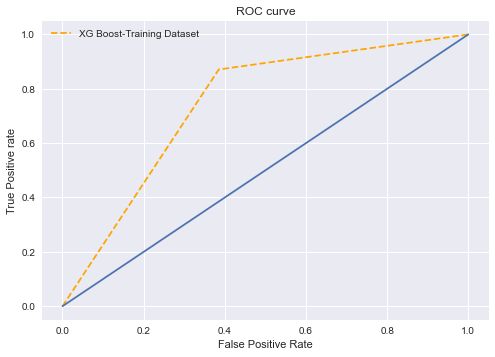

In [25]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr_train, tpr_train, linestyle='--',color='orange', label='XG Boost-Training Dataset')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

# Plot positive sloped 1:1 line for reference
plt.plot([0,1],[0,1])

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### ROC Curve for test dataset

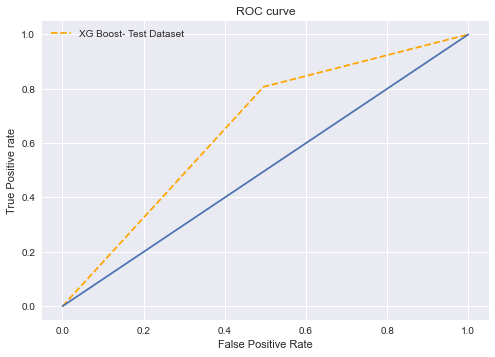

In [26]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='XG Boost- Test Dataset')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

# Plot positive sloped 1:1 line for reference
plt.plot([0,1],[0,1])

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Algorithm Selection

In [ ]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
 
# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	# lr
# 	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
# 	model = DecisionTreeClassifier()
# 	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# perceptron
# 	rfe = RFE(estimator=Perceptron(), n_features_to_select=15)
# 	model = DecisionTreeClassifier()
# 	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# cart
# 	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
# 	model = DecisionTreeClassifier()
# 	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# rf
# 	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=15)
# 	model = DecisionTreeClassifier()
# 	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# gbm
# 	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=15)
# 	model = DecisionTreeClassifier()
# 	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model, X, y):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores
 
# # define dataset
# y = Y_train
# X = X_train

# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
# 	scores = evaluate_model(model, X, y)
# 	results.append(scores)
# 	names.append(name)
# 	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()